In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.utils import class_weight
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier


# Read CSV

In [2]:
df = pd.read_csv("../input/geneall-data-filtered/GeneALL_Data_filtered.csv")

In [3]:
print(df)

     Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1          ID Group Sex   Age  \
0             0             0             0.0  002_S_0295    CN   M  85.0   
1             1             1             0.0  002_S_0413    CN   F  76.0   
2             2             2             0.0  002_S_0559    CN   M  79.0   
3             3             3             0.0  002_S_0619    AD   M  78.0   
4             4             4             0.0  002_S_0685    CN   F  90.0   
..          ...           ...             ...         ...   ...  ..   ...   
745         745           112             0.0  941_S_1202    CN   M  78.0   
746         746           113             0.0  941_S_1203    CN   M  83.0   
747         747           114             0.0  941_S_1295   MCI   M  77.0   
748         748           115             0.0  941_S_1311   MCI   M  69.0   
749         749           116             0.0  941_S_1363   MCI   F  70.0   

     rs10460695  rs1150895  rs11666145  ...  rs6516727  rs7276036  rs727883

In [4]:
df = pd.read_csv("../input/geneall-data-filtered/GeneALL_Data_filtered.csv").drop(["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.1.1","ID"], axis=1)

In [5]:
print(df)

    Group Sex   Age  rs10460695  rs1150895  rs11666145  rs11702267  \
0      CN   M  85.0           0          0           0           0   
1      CN   F  76.0           0          0           0           0   
2      CN   M  79.0           0          1           0           1   
3      AD   M  78.0           0          1           0           0   
4      CN   F  90.0           0          1           0           0   
..    ...  ..   ...         ...        ...         ...         ...   
745    CN   M  78.0           0          0           0           0   
746    CN   M  83.0           0          0           0           0   
747   MCI   M  77.0           0          0           0           0   
748   MCI   M  69.0           0          1           0           0   
749   MCI   F  70.0           0          0           0           0   

     rs12482262  rs12482753  rs1295640  ...  rs6516727  rs7276036  rs7278838  \
0             0           0          2  ...          0          0          0   

In [6]:
df['Group'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Group'])

In [7]:
print(df)

    Group Sex   Age  rs10460695  rs1150895  rs11666145  rs11702267  \
0      CN   M  85.0           0          0           0           0   
1      CN   F  76.0           0          0           0           0   
2      CN   M  79.0           0          1           0           1   
3      AD   M  78.0           0          1           0           0   
4      CN   F  90.0           0          1           0           0   
..    ...  ..   ...         ...        ...         ...         ...   
745    CN   M  78.0           0          0           0           0   
746    CN   M  83.0           0          0           0           0   
747   MCI   M  77.0           0          0           0           0   
748   MCI   M  69.0           0          1           0           0   
749   MCI   F  70.0           0          0           0           0   

     rs12482262  rs12482753  rs1295640  ...  rs6516727  rs7276036  rs7278838  \
0             0           0          2  ...          0          0          0   

# Encode Categorical Data

In [8]:
#CN 1, AD 0, MCI 2
#M 1, F 0
label_encoder = LabelEncoder()
df["Group"]= label_encoder.fit_transform(df["Group"])
df["Sex"]= label_encoder.fit_transform(df["Sex"])

# Get Features and Labels

In [9]:
features = df.drop('Group',axis=1)
label= df.Group

# Split Data into Training and Testing

In [10]:
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,stratify=label,random_state = 42)

# Select Most Important Features

# GB Trees

In [11]:
GBTkfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
hyperparameters = {"learning_rate" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], "n_estimators" : list(range(50, 1001, 1)), "criterion": ['friedman_mse', 'squared_error'], "min_samples_split" : list(range(2, 51, 1)),"min_samples_leaf": list(range(1,11 ,1)), "max_depth": list(range(1, 11, 1))}

bestModelFound = RandomizedSearchCV(GradientBoostingClassifier(random_state=42),hyperparameters,scoring='accuracy',cv=GBTkfold,n_jobs=-1)
bestModelFound.fit(x_train,y_train)
print("The best score found is:",bestModelFound.best_score_)

best_learning_rate= bestModelFound.best_params_.get("learning_rate")
print("best learning rate:",best_learning_rate)

bestNestimators = bestModelFound.best_params_.get("n_estimators")
print("The best N estimators is:",bestNestimators)

bestCriterion = bestModelFound.best_params_.get("criterion")
print("The best Criterion is:",bestCriterion)

bestMinSampleSplit = bestModelFound.best_params_.get("min_samples_split")
print("The best Min sample split is:",bestMinSampleSplit)
                                            
bestMinSampleLeaf = bestModelFound.best_params_.get("min_samples_leaf")
print("The best Min sample Leaf is:",bestMinSampleLeaf)
                                            
bestMaxDepth = bestModelFound.best_params_.get("max_depth")
print("The best Max Depth is:",bestMaxDepth)

The best score found is: 0.44223163841807905
best learning rate: 0.2
The best N estimators is: 976
The best Criterion is: squared_error
The best Min sample split is: 29
The best Min sample Leaf is: 3
The best Max Depth is: 1


In [12]:
gbt = GradientBoostingClassifier(n_estimators=bestNestimators, learning_rate=best_learning_rate, max_depth=bestMaxDepth,criterion=bestCriterion,min_samples_split=bestMinSampleSplit, min_samples_leaf=bestMinSampleLeaf, random_state=42)

In [13]:
feature_selector = RFE(gbt, step=1, n_features_to_select=40)

In [14]:
feature_selector.fit(x_train, y_train)

RFE(estimator=GradientBoostingClassifier(criterion='squared_error',
                                         learning_rate=0.2, max_depth=1,
                                         min_samples_leaf=3,
                                         min_samples_split=29, n_estimators=976,
                                         random_state=42),
    n_features_to_select=40)

# Plot Most Important Features

In [15]:
# Print the optimal number of features
print("Optimal number of features is:",feature_selector.n_features_)
print("The selected features are:",x_train.columns[(feature_selector.get_support())])

Optimal number of features is: 40
The selected features are: Index(['Sex', 'Age', 'rs1150895', 'rs11702267', 'rs1295640', 'rs17001492',
       'rs17588612', 'rs1783016', 'rs1787438', 'rs216779', 'rs2186302',
       'rs2256331', 'rs2829973', 'rs2829984', 'rs2829997', 'rs2830000',
       'rs2830012', 'rs2830017', 'rs2830028', 'rs2830033', 'rs2830040',
       'rs2830044', 'rs2830052', 'rs2830088', 'rs2830104', 'rs362350',
       'rs362393', 'rs373521', 'rs375369', 'rs3787620', 'rs3787630',
       'rs380417', 'rs439401', 'rs462281', 'rs7276036', 'rs7278838',
       'rs769451', 'rs8006497', 'rs8106922', 'rs8127122'],
      dtype='object')


Text(0, 0.5, 'FEATURE NAMES')

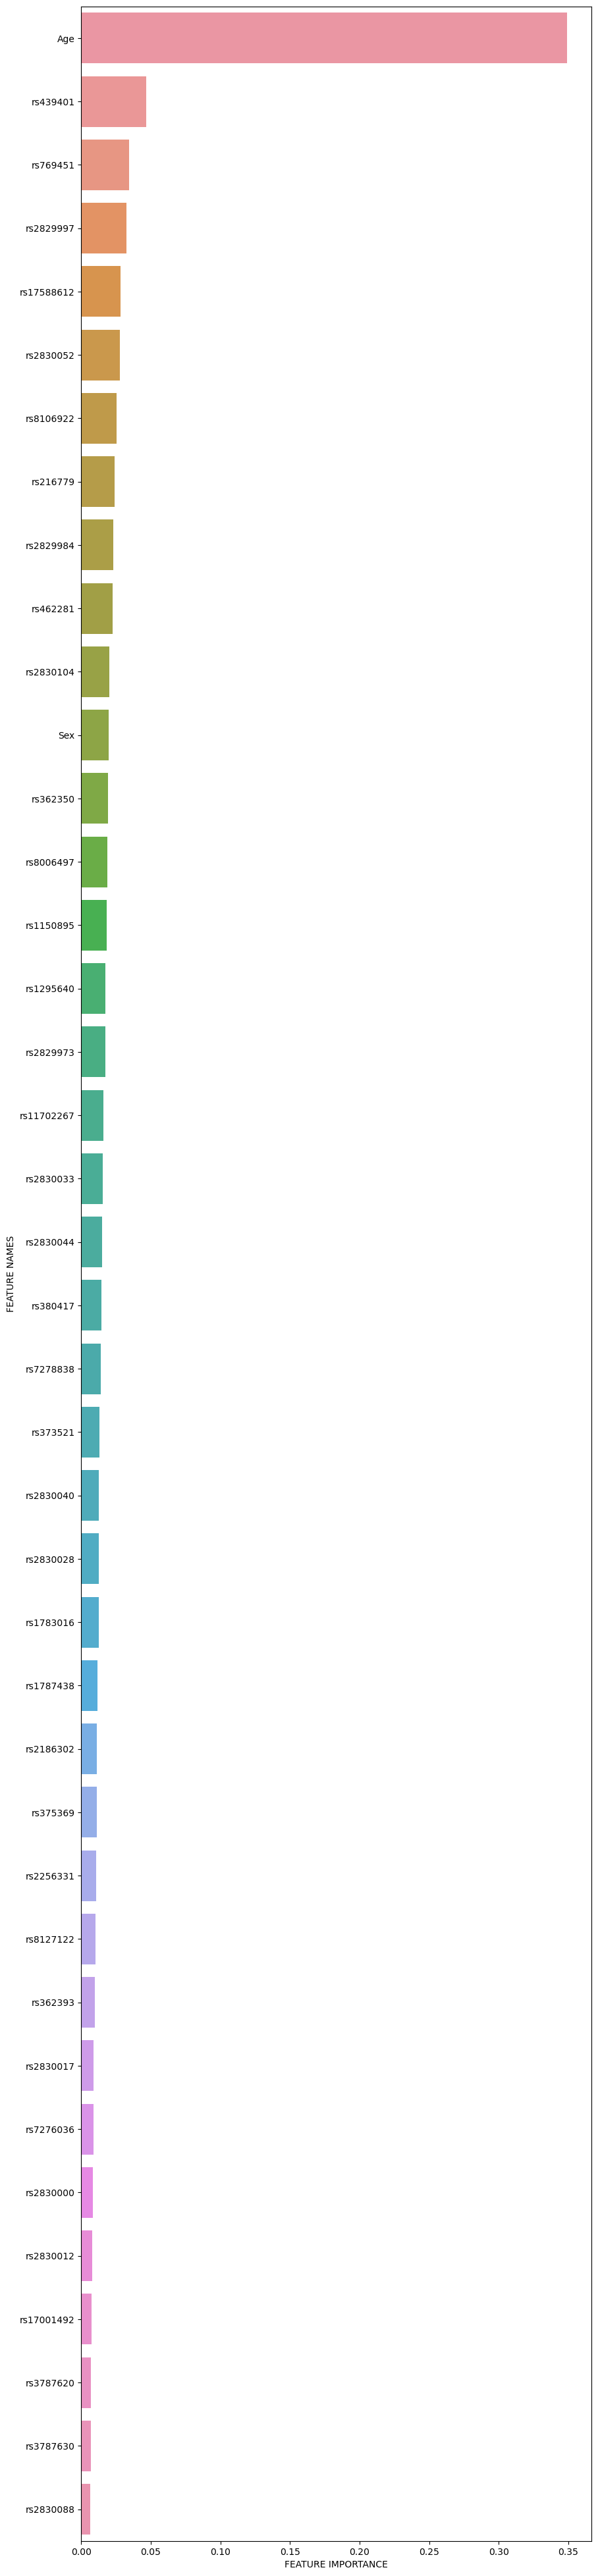

In [16]:
#Create arrays of features importance and feature names
features_importance = np.array(feature_selector.estimator_.feature_importances_)
feature_names = np.array(x_train.columns[(feature_selector.get_support())])

#Create a data frame using a dictionary
data={'feature_names':feature_names,'features_importance':features_importance}
feature_df = pd.DataFrame(data)

#Sort the data frame according to decreasing feature importance
feature_df.sort_values(by=['features_importance'], ascending=False,inplace=True)

#Define size of plot
plt.figure(figsize=(10,50))

#Plot
sns.barplot(x=feature_df['features_importance'], y=feature_df['feature_names'])

plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

# Remove Non Important Features

In [17]:
x_train= feature_selector.transform(x_train)
x_test = feature_selector.transform(x_test)

# SVM classifier 

In [18]:
# SVMKFold = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
# hyperparameters = {"C": [0.1, 1, 10, 100],"degree": [2, 3, 4, 5],"coef0": [0, 1, 10, 100]}

# bestModelFound = GridSearchCV(SVC(kernel = "poly",probability= True,random_state = 42, class_weight = class_weights_dict),hyperparameters,scoring='accuracy',cv=SVMKFold,n_jobs=-1)
# bestModelFound.fit(x_train,y_train)
# print("The best score found is:",bestModelFound.best_score_)

# bestC= bestModelFound.best_params_.get('C')
# print("The best C is:",bestC)
# bestDegree = bestModelFound.best_params_.get('degree')
# print("The best degree is:",bestDegree)
# bestCoef0 = bestModelFound.best_params_.get('coef0')
# print("The best coef0 is:",bestCoef0)


# Class Weights

In [19]:
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(y_train),
                                                 y = y_train)
print(class_weights)
class_weights_dict = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2]}
print(class_weights_dict)

[1.4468599  1.1745098  0.68613975]
{0: 1.4468599033816425, 1: 1.1745098039215687, 2: 0.6861397479954181}


In [20]:
svm_classfier = SVC(kernel = "poly",probability= True,random_state = 42, class_weight = class_weights_dict)

In [21]:
svm_classfier.fit(x_train, y_train)

SVC(class_weight={0: 1.4468599033816425, 1: 1.1745098039215687,
                  2: 0.6861397479954181},
    kernel='poly', probability=True, random_state=42)

In [22]:
svm_predict = svm_classfier.predict(x_test)

In [23]:
print(np.array(y_test))
print(svm_predict)

[2 0 2 2 1 0 1 2 2 0 2 1 0 1 0 2 2 2 2 2 1 2 2 1 1 1 2 1 1 2 1 1 2 2 2 0 0
 0 1 1 2 2 1 0 1 1 2 2 1 1 1 0 0 2 2 1 0 2 2 2 2 0 2 0 2 0 2 2 2 2 1 1 0 1
 1 0 0 2 2 2 0 2 2 2 2 1 0 2 2 0 0 2 2 2 0 2 1 0 0 0 2 2 0 1 0 2 2 2 2 1 1
 2 2 2 2 0 2 0 2 2 2 1 2 1 2 1 1 1 2 1 1 2 0 0 2 2 2 2 0 1 0 1 2 1 2 0 1 1
 2 2]
[2 0 2 0 2 2 2 2 1 2 2 2 2 0 2 2 2 0 2 0 2 2 2 0 2 2 0 0 1 2 2 2 2 0 2 2 2
 1 0 2 1 0 2 2 1 0 0 2 2 2 2 0 2 0 2 1 2 2 2 1 2 0 0 2 2 2 0 0 1 1 0 2 0 2
 2 2 2 1 2 1 2 2 0 0 0 0 0 0 2 0 2 2 0 2 0 2 1 0 2 2 0 2 2 2 1 2 2 2 2 0 2
 0 2 0 1 2 0 2 2 0 0 0 2 0 2 2 1 2 0 1 1 0 2 2 2 2 0 2 0 1 0 1 2 2 0 0 2 0
 0 2]


# Accuracy Score 

In [24]:
print("accruracy score is : " , accuracy_score(np.array(y_test), svm_predict)) 

accruracy score is :  0.38666666666666666


# Model Confusion Matrix

In [25]:
label_name=["AD","CN","MCI"]

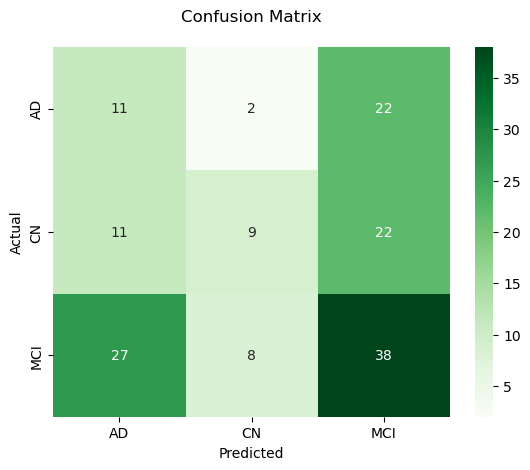

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

ConfusionMatrix = confusion_matrix(np.array(y_test),svm_predict)
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_name, yticklabels=label_name)
plt.title("Confusion Matrix\n")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Model Classification Report

In [27]:
from sklearn.metrics import classification_report

print("Classification Report\n")
print(classification_report(np.array(y_test),svm_predict, target_names=["AD","CN","MCI"]))

Classification Report

              precision    recall  f1-score   support

          AD       0.22      0.31      0.26        35
          CN       0.47      0.21      0.30        42
         MCI       0.46      0.52      0.49        73

    accuracy                           0.39       150
   macro avg       0.39      0.35      0.35       150
weighted avg       0.41      0.39      0.38       150

